In [1]:
import pandas as pd
import numpy as np

# 可視化用のライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import neologdn
import MeCab

import re

In [2]:
df = pd.read_csv('all_text_wakatigaki.csv',encoding='utf-8')
df.head()

,surface,yomi,original,type,katsuyoukei,katsuyougata,内容
0,neologd,ネオログディー,NEologd,名詞-固有名詞-一般,NaN,NaN,neologd_tagger.parse(text)で各単語の原形、品詞などが1行で連続して...
1,_,_,_,記号-一般,NaN,NaN,neologd_tagger.parse(text)で各単語の原形、品詞などが1行で連続して...
2,tagger,タガー,tagger,名詞-固有名詞-一般,NaN,NaN,neologd_tagger.parse(text)で各単語の原形、品詞などが1行で連続して...
3,.,.,.,記号-一般,NaN,NaN,neologd_tagger.parse(text)で各単語の原形、品詞などが1行で連続して...
4,parse,パース,Parse,名詞-固有名詞-一般,NaN,NaN,neologd_tagger.parse(text)で各単語の原形、品詞などが1行で連続して...


### 文章毎に含まれる単語数をカウント

In [3]:
# [内容]カラムをグループ化しカウント　
# reset_index関数を使い[内容]カラムをindex部分からデータ列部分に戻す
per_sentence_word_cnt = df.groupby('内容')['original'].count().reset_index()

# カラム名を[original]から[word_cnt]に変更
per_sentence_word_cnt = per_sentence_word_cnt.rename(columns={'original':'word_cnt'})
# 確認
per_sentence_word_cnt

,内容,word_cnt
0,neologd_tagger.parse(text)で各単語の原形、品詞などが1行で連続して...,26
1,まずはparse()で分かち書きした単語群は1つの文字列型になっているので「\n」で区切り、...,30
2,原形、品詞などの間には「\t」が、分かち書きされた単語と単語の区切りには「\n」が表示される,33
3,次に邪魔な文字「\t」を省きたい。よって、split('\t')を使用したいがwakatid...,41


In [4]:
# 文章全体の単語数をカウント(重複あり)
print('文章全体の単語数(重複あり)は{}語です。'.format(len(df)))

文章全体の単語数(重複あり)は130語です。


### 文章全体の単語数(重複なし)をカウント

In [5]:
unique_word_cnt = df['original'].nunique()
print('文章全体の単語数(重複なし)は{}語です。'.format(unique_word_cnt))

文章全体の単語数(重複なし)は66語です。


### 単語毎の出現回数をカウント

In [6]:
word_cnt_df = df['original'].value_counts().reset_index()

# カラム名を適切な名前に変更
word_cnt_df = word_cnt_df.rename(columns={'index':'original', 'original':'count'})

# 確認
word_cnt_df

,original,count
0,する,7
1,の,5
2,、,5
3,で,5
4,は,5
5,に,4
6,」,4
7,型,4
8,が,4
9,単語,4


## ヒストグラムの描画し単語の頻度の分布を確認

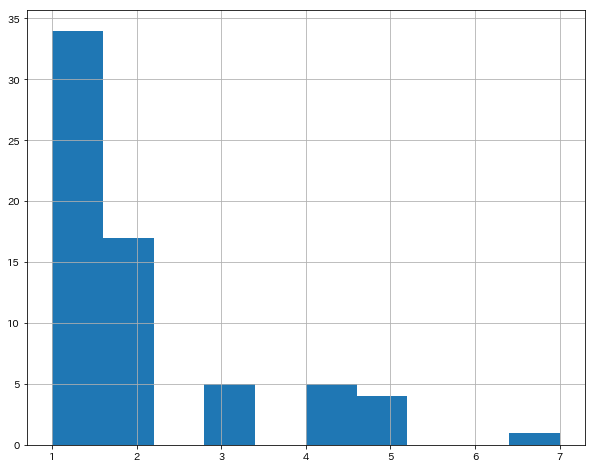

In [7]:
# 分布範囲が1つに固まってしまう場合はbinsの範囲を調整する
# word_cnt_df["count"].hist(bins=range(0, 200000, 5000), figsize=(10,8))
word_cnt_df["count"].hist(figsize=(10,8))

## Y軸の範囲をlogスケールに変更してヒストグラムを描画
binsの範囲を調整しても分布範囲が1つに固まってしまう場合

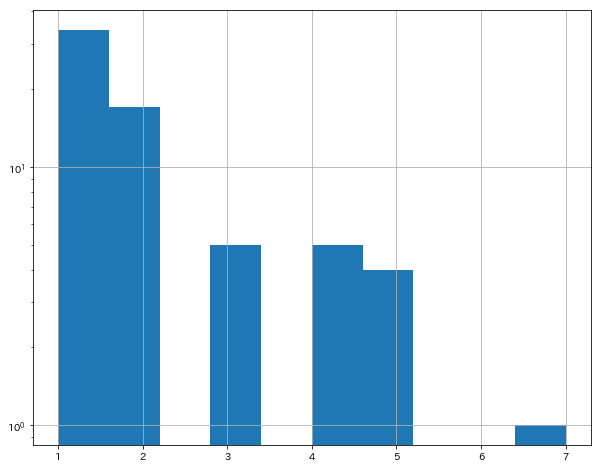

In [8]:
word_cnt_df["count"].hist(figsize=(10,8))
plt.yscale("log")